# Numerical solution of integral equations

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Method of successive approximations

In [2]:
def simpson_formula(y: list, K, f, lm, N, a, b):
    h = (b - a) / N
    x = [a + h * k for k in range(N + 1)]
    y_new = []
    for i in range(N + 1):
        I = h / 3 * (K(x[i], x[0]) * y[0] + K(x[i], x[N]) * y[N])
        for j in range(1, N, 2):
            I += 4 / 3 * h * K(x[i], x[j]) * y[j]
        for j in range(2, N, 2):
            I += 2 / 3 * h * K(x[i], x[j]) * y[j]
        y_new.append(lm * I + f(x[i]))
    return y_new


def successive_approximations(K, f, lm, eps, a, b, m):
    def calculate_y(N):
        R_y = np.inf
        y_1 = [0 for i in range(N + 1)]
        
        while R_y > eps / 100:
            y_0 = y_1
            y_1 = simpson_formula(y_0, K, f, lm, N, a, b)
            R_y = np.linalg.norm([y_1[i] - y_0[i] for i in range(N + 1)], np.inf)
            
        return y_1
        
        
    N = 2
    y_1 = calculate_y(N)
    
    R = np.inf
    while R > eps:
        N *= 2
        y_0 = y_1
        y_1 = calculate_y(N)
        y_1_comp = y_1[::2]
        R = np.linalg.norm([y_1_comp[i] - y_0[i] for i in range(N // 2 + 1)], np.inf) / (2 ** m - 1)
        
    print('Runge method residual: ', R)
    
    return y_1

In [3]:
eps = 5 * 10 ** -5
a = 0
b = 1
m = 4

def u(x):
    return 1


def K(x, s):
    return (x + s) / (1 + x + s)


def f(x):
    return np.log(2 + x) - np.log(1 + x)


lm = 1

y = successive_approximations(K, f, lm, eps, a, b, m)

Runge method residual:  7.5260853087992055e-06


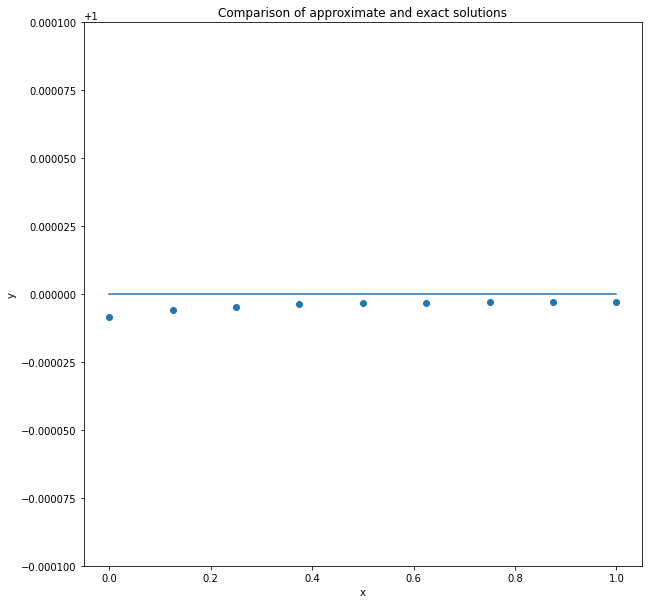

In [4]:
h = (b - a) / (len(y) - 1)
x = [a + h * k for k in range(len(y))]
u_lst = [u(x_i) for x_i in x]

plt.figure(figsize=(10, 10))
plt.ylim(0.9999, 1.0001)
plt.scatter(x, y)
plt.plot(x, u_lst)
plt.title('Comparison of approximate and exact solutions')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [5]:
np.linalg.norm([y[i] - u_lst[i] for i in range(len(y))], np.inf)

8.51617361052881e-06

### Quadrature method

In [6]:
def trapeze_formula(K, f, lm, N, a, b):
    h = (b - a) / N
    x = [a + h * k for k in range(N + 1)]
    y = [f(x[0])]
    for i in range(1, N + 1):
        y_cur = f(x[i]) + lm * h / 2 * K(x[i], x[0]) * y[0]
        for j in range(1, i):
            y_cur += lm * h * K(x[i], x[j]) * y[j]
        y_cur /= (1 - lm * h / 2 * K(x[i], x[i]))
        y.append(y_cur)
    return y


def quadrature_method(K, f, lm, eps, a, b, m):
    N = 2
    y_1 = trapeze_formula(K, f, lm, N, a, b)
    R = np.inf
    
    while R > eps:
        N *= 2
        y_0 = y_1
        y_1 = trapeze_formula(K, f, lm, N, a, b)
        y_1_comp = y_1[::2]
        R = np.linalg.norm([y_1_comp[i] - y_0[i] for i in range(N // 2 + 1)], np.inf) / (2 ** m - 1)
         
    print('Runge method residual: ', R)
    
    return y_1

In [7]:
eps = 5 * 10 ** -5
a = 0
b = 1
m = 2

def u(x):
    return 5 * x ** 2


def K(x, s):
    return x ** 3 * np.cos(x * s)


def f(x):
    return 5 * x ** 2 - 2 * np.sin(x ** 2) + x ** 4 * np.sin(x ** 2) + 2 * x ** 2 * np.cos(x ** 2)


lm = -1 / 5

y = quadrature_method(K, f, lm, eps, a, b, m)

Runge method residual:  4.2265816986593784e-05


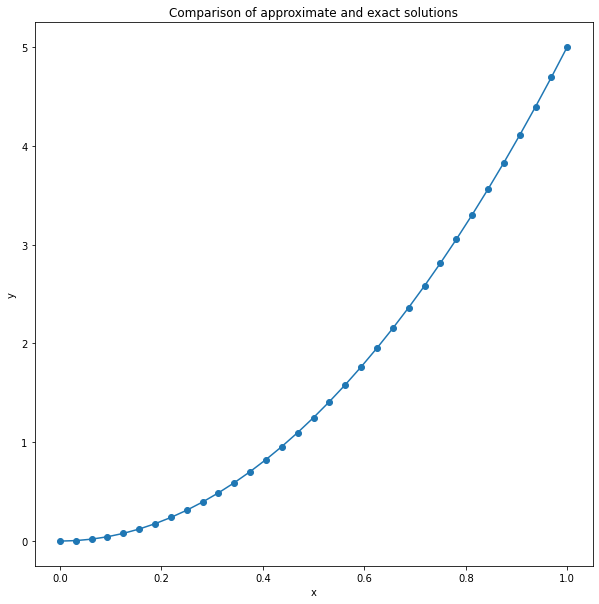

In [8]:
h = (b - a) / (len(y) - 1)
x = [a + h * k for k in range(len(y))]
u_lst = [u(x_i) for x_i in x]

plt.figure(figsize=(10,10))
plt.scatter(x, y)
plt.plot(x, u_lst)
plt.title('Comparison of approximate and exact solutions')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [9]:
np.linalg.norm([y[i] - u_lst[i] for i in range(len(y))], np.inf)

4.2268820077406843e-05